# IMPORTING PACKAGES

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import string
from collections import Counter
from nltk.stem.wordnet import WordNetLemmatizer

# DATA LOAD AND PROCESSING

In [58]:
df = pd.read_csv('condition_test.csv')

In [59]:
df.head()

,Index,label (depression result),message to examine
0,8 7,0,joeymarieward Ohh boy craziness in Marlatt
1,7 35,0,JimLanzalotto Absolutely You might catch me ...
2,68 5,0,i ve now fallen in love with true blood thank...
3,6 85,0,likeSunday sorry at least a netbook is the ...
4,6 76,0,dj spinner thanks for the encouragement


In [60]:
df.shape

(10314, 3)

In [61]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [62]:
df.isnull().sum()

Index                        0
label (depression result)    0
message to examine           1
dtype: int64

We can see message to examine Contain 1 Null Values, so now we willl replace this message to examine which empty string.

In [63]:
df['message to examine'] = df['message to examine'].fillna('') #replacing null with empty string


In [64]:
df.isnull().sum()

Index                        0
label (depression result)    0
message to examine           0
dtype: int64

Now we will drop all not required Columns.

In [65]:
df = df.drop(['Index'], axis =1) # dropping not required Data

In [66]:
df.head()

,label (depression result),message to examine
0,0,joeymarieward Ohh boy craziness in Marlatt
1,0,JimLanzalotto Absolutely You might catch me ...
2,0,i ve now fallen in love with true blood thank...
3,0,likeSunday sorry at least a netbook is the ...
4,0,dj spinner thanks for the encouragement


<AxesSubplot: xlabel='label (depression result)', ylabel='count'>

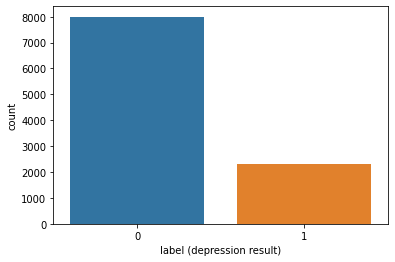

In [67]:
sns.countplot(x='label (depression result)',data=df) #Check is data is imbalance

We can see that Data is imbalance we will adjust it afterwards.

In [68]:
text, sentiment = list(df['message to examine']), list(df['label (depression result)'])

# TEXT PREPROCESSING

We will be removing special characters, extra symbols, stopwords function and make clean data, after that we will use Lemmatizer transform our data which we convert it into vectors.

In [69]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [70]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)     
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [71]:
processedtext = preprocess(text)

In [72]:
processedtext

['joeymarieward ohh boy craziness in marlatt ',
 'jimlanzalotto absolutely you might catch me at mac and manco a well ',
 've now fallen in love with true blood thanks to seozombie ',
 'likesunday sorry at least netbook is the cheaper route you can also take ur netbook to an apple store and use their wifi ',
 'dj spinner thanks for the encouragement ',
 'at least get service in here ',
 'cassieventura hey whats up girl ',
 'many thanks to cattyg poptopvw for noting little old me on this happy followfriday very flattered ',
 'carrot and hummous mm tinyurl rcynho ',
 'xwidep that exactly what had for dinner except had an onion bhaji with it too nom ',
 'on my way to karaoke how fun hope you all have good night xoxo pickchick ',
 'mrrathbone so sorry we blew up your tweeter today we were bad girl missing our mr funny hope get some time soon relax amp laugh ',
 'so hungry am waiting for crystal to come back from railmall my bcm ',
 'kiunedd you re my lewis and clark of orbit flavor let me 

# Vectorization of Data and Train Test Split
using TFIDF for vector.

In [73]:
Tfid = TfidfVectorizer(max_features=3000)

In [74]:
x = processedtext
y = sentiment

In [75]:
x

['joeymarieward ohh boy craziness in marlatt ',
 'jimlanzalotto absolutely you might catch me at mac and manco a well ',
 've now fallen in love with true blood thanks to seozombie ',
 'likesunday sorry at least netbook is the cheaper route you can also take ur netbook to an apple store and use their wifi ',
 'dj spinner thanks for the encouragement ',
 'at least get service in here ',
 'cassieventura hey whats up girl ',
 'many thanks to cattyg poptopvw for noting little old me on this happy followfriday very flattered ',
 'carrot and hummous mm tinyurl rcynho ',
 'xwidep that exactly what had for dinner except had an onion bhaji with it too nom ',
 'on my way to karaoke how fun hope you all have good night xoxo pickchick ',
 'mrrathbone so sorry we blew up your tweeter today we were bad girl missing our mr funny hope get some time soon relax amp laugh ',
 'so hungry am waiting for crystal to come back from railmall my bcm ',
 'kiunedd you re my lewis and clark of orbit flavor let me 

In [76]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [78]:
x = Tfid.fit_transform(x)

After transforming our data we will now settle imbalance data by using oversampling SMOTE. 

In [79]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)

Counter({0: 8000, 1: 8000})


<AxesSubplot: ylabel='count'>

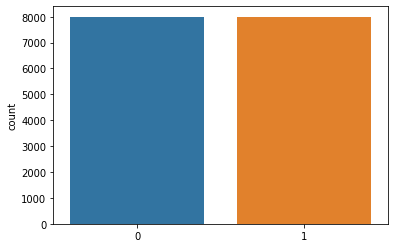

In [80]:
sns.countplot(x=y,data=df) #Check is data is imbalance

In [81]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [82]:
X_train.shape

(11200, 3000)

In [112]:
pd.DataFrame(X_train.toarray(), columns=Tfid.get_feature_names())

C:\Users\we\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aahh,ab,ability,able,about,above,absolutely,abt,abuse,...,youtu,youtube,youu,yr,yum,yumm,yummy,yup,zoo,zz
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11196,0.0,0.0,0.0,0.0,0.0,0.137022,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11197,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11198,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
pd.DataFrame(X_test.toarray(), columns=Tfid.get_feature_names())

C:\Users\we\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aahh,ab,ability,able,about,above,absolutely,abt,abuse,...,youtu,youtube,youu,yr,yum,yumm,yummy,yup,zoo,zz
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4796,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Different Machine Learning Models

## Naive Bayes(MultinomialNB)
Naive Bayes is an model that is utilized tremendous measures information; it is the proposed methodology in
any event, while working with information that incorporates a large number of information records. It does NLP
undertakings like profound examination with astounding outcomes. A fast and straightforward grouping
calculation is utilized.
A classifier is an AI model isolating various items based on specific elements of factors. A sort of classifier deals
with the Bayes hypothesis. Expectation of enrollment probabilities is made for each class, for example, the
likelihood of information focuses related with a specific class.


In [89]:
Multi = MultinomialNB()

In [90]:
Multi.fit(X_train,y_train)

MultinomialNB()

In [91]:
y_pred = Multi.predict(X_test)

In [92]:
print(accuracy_score(y_test,y_pred))

0.95


In [93]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[2212,  164],
       [  76, 2348]], dtype=int64)

<AxesSubplot: >

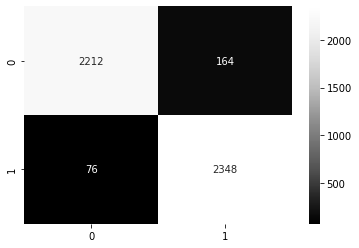

In [94]:
sns.heatmap(confusion_matrix, annot=True, cmap='Greys_r', fmt='g')

In [95]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2376
           1       0.93      0.97      0.95      2424

    accuracy                           0.95      4800
   macro avg       0.95      0.95      0.95      4800
weighted avg       0.95      0.95      0.95      4800



Multinomial Naive Bayes is giving 0.95 accuracy with only 241 wrong answers in Confusion matrix.

# Logistic Regression

A logistic regression model can represent the reality a variety of information rules. On account of school
permission, the calculated capability might take thought components like the understudy's Degree, SAT score,
and recurrence of extracurricular exercises. According to previous outcomes and utilize similar information
standards, it positions preparing cases on their possibilities falling in to one of the two result gatherings.
Relapse examination has filled set up with regards to AI. It empowers AI calculations to portray showing up input
past data. As additional significant information is stacked, the motors work on by and large ability to expect
characterizations all through informational collections.

In [96]:
log = LogisticRegression(solver='liblinear', penalty='l1')

In [97]:
model = log.fit(X_train,y_train)

In [98]:
y_pred1 = log.predict(X_test)

In [99]:
print(accuracy_score(y_test,y_pred1))

0.9777083333333333


In [100]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test,y_pred1)
cfm

array([[2373,    3],
       [ 104, 2320]], dtype=int64)

<AxesSubplot: >

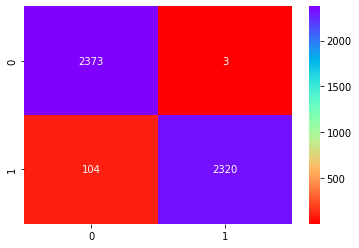

In [101]:
sns.heatmap(cfm, annot=True, cmap='rainbow_r', fmt='g')

In [102]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2376
           1       1.00      0.96      0.98      2424

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



LogisticRegression is giving 0.98 accuracy and wrong answer of 105 in Confusion matrix.

# Support Vector Machine (SVC)

This Model is that might be utilized for characterization and relapse undertakings. It is, be that as it may, to a
great extent utilized in order hardships. Every info item is mapped as a point in layered space, with the worth of
each component being the impotance of any direction in the SVM . Individual perception arranges are utilized to
ascertain sSV. This classifier is a wilderness that great recognizes the hyper-plane/line.

In [103]:
support = SVC(kernel='sigmoid', gamma=1.0)

In [104]:
model2 = support.fit(X_train,y_train)

In [105]:
y_pred2 = model2.predict(X_test)

In [106]:
print(accuracy_score(y_test,y_pred2))

0.9722916666666667


In [107]:
cfm1 = confusion_matrix(y_test,y_pred2)
cfm1

array([[2276,  100],
       [  33, 2391]], dtype=int64)

<AxesSubplot: >

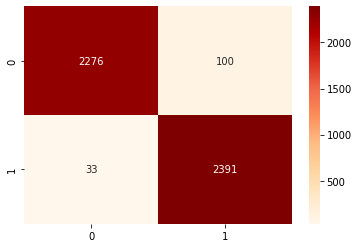

In [108]:
sns.heatmap(cfm1, annot=True, cmap='OrRd', fmt='g')

In [109]:
print(classification_report(y_test , y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2376
           1       0.96      0.99      0.97      2424

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



SVC is giving 0.98 accuracy and wrong answer of 105 in Confusion matrix.

# CONCLUSION

As we have used different types of Machine Learning Models and see that Support Vector Machine show great
Accuracy with great Precision. Confusion Matrix also shows that this model only predict 103 wrong answers most less and better overall scores. Logistic Regression have great and very similar scores but its overall scores are good as SVC as it is giving a lot wrong answer in single part but SVC have balance and all over good precision recall in both 1 and 0. Now we will be doing prediction with our model and see what it does to the new information

In [49]:
def depressiondetect(data):
    in_data = [data]
    in_data =  preprocess(in_data)
    vector_data = Tfid.transform(in_data)
    prediction = model2.predict(vector_data)
    if prediction == 1:
        return 'Depression'
    else:
        return 'Non Depression'
    
    print(prediction)

In [50]:
depressiondetect('joeymarieward Ohh boy craziness in Marlatt')

'Non Depression'

In [51]:
depressiondetect('Ketamine Nasal Spray Shows Promise Against Depression  Suicide  health    cmun ')

'Depression'

We can clearly see our Model is working alright and correctly, we will can see that our model is reacting greatly to new information.